In [1]:
import pennylane as qml
from pennylane import numpy as np

from Ising_circuit_4qubits import Ising
import matplotlib.pyplot as plt

In [18]:
J = np.load("J.npy")
h_values = np.load("transverse_fields.npy")

#energy_values = np.load("datasets/gsenergy4.npy") #open BC
ground_states = np.load('gs4_closed.npy') #'datasets/gs4.npy' for Open BC #for closed, use "gs4_closed.npy"

idx = 2
h = h_values[idx]
print(h)

gs = ground_states[idx]
rho = np.outer(gs, np.conjugate(gs)) #density matrix of gs

0.0707070707070707


In [19]:
n_qubits = 4
dev = qml.device("default.qubit", wires = n_qubits)
@qml.qnode(dev)
def gs_circuit(h, subregion): #pass the subregion as an argument(don't include qubits you want to trace out)
    Ising(h)
    return qml.density_matrix(wires = subregion) 

rho_circuit = gs_circuit(h, [0, 1,2,3])

In [20]:
np.allclose(rho, rho_circuit) #they are different because the dataset does not solve Ising as if it were infinite... finite size effetcs

False

In [21]:
def partial_trace(rho, keep, dims=None):
    """
    Trace out all qubits except those in `keep`.
    
    Args:
        rho (np.ndarray): density matrix (2^n x 2^n)
        keep (list[int]): indices of qubits to keep (0 = leftmost qubit)
        dims (list[int], optional): local dimensions (default: all 2)
    
    Returns:
        np.ndarray: reduced density matrix for the kept qubits
    """
    # number of subsystems
    n = int(np.log2(rho.shape[0]))
    if dims is None:
        dims = [2] * n

    # indices to trace out
    trace_out = [i for i in range(n) if i not in keep]
    
    # reshape into tensor with 2n indices
    rho_tensor = rho.reshape(dims + dims)
    
    # perform partial trace
    for i in sorted(trace_out, reverse=True):
        rho_tensor = np.trace(rho_tensor, axis1=i, axis2=i + n)
        
    # reshape back to matrix
    d_keep = int(np.prod([dims[i] for i in keep]))
    return rho_tensor.reshape((d_keep, d_keep))


In [22]:
def PT_2qubits(rho): #pairwise PT ie between 2 qubits (recall in this case PPT = = separable )
    rho_AB = rho.reshape(2,2,2,2) #iA iB, jA jB corresponds to 0,1,2,3
    rho_ABPT = rho_AB.transpose(2, 1, 0, 3)  #swapped iA and jA so im taking A | B partition
   
    rho_PT = rho_ABPT.reshape(4,4)
    eigs = np.linalg.eigvalsh(rho_PT)

    if min(eigs) > -1e-8:
        print('PPT')
    
    log_neg = np.log2(np.sum(np.abs(eigs)))

    return eigs, log_neg

PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT
PPT


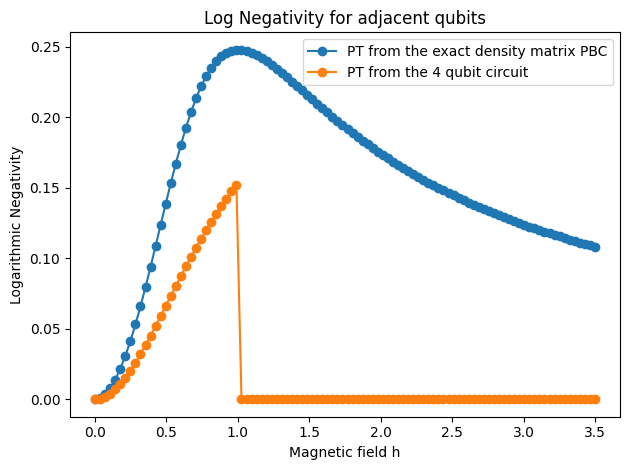

In [23]:
ln_data = {'exact': [], 'circuit': []}
subregion = [0,2]
for idx, h in enumerate(h_values):
    gs = ground_states[idx]
    rho = np.outer(gs, np.conjugate(gs))
    rho_t = partial_trace(rho, keep=subregion)
    
    rho_circuit = gs_circuit(h, subregion)
    
    eigs, ln = PT_2qubits(rho_t)
    ln_data['exact'].append(ln)

    eigs, ln_circuit = PT_2qubits(rho_circuit)
    ln_data['circuit'].append(ln_circuit)

plt.figure()
plt.plot(h_values, ln_data['exact'], label=f'PT from the exact density matrix PBC', marker='o')
plt.plot(h_values, ln_data['circuit'], label=f'PT from the 4 qubit circuit', marker='o')

plt.xlabel('Magnetic field h')
plt.ylabel('Logarithmic Negativity')
plt.title('Log Negativity for adjacent qubits')
plt.legend()
plt.tight_layout()
plt.show()